In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
def xlsx_to_csv(input_file, output_file):
  
    df = pd.read_excel(input_file)

   
    df.to_csv(output_file, index=False)

xlsx_to_csv("bankfull.xlsx", "bank.csv")


In [3]:
data=pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:



label_encoder = LabelEncoder()


for column in data.columns:
    if data[column].dtype == 'object': 
        data[column] = label_encoder.fit_transform(data[column])




In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.job

0         4
1         9
2         2
3         1
4        11
         ..
45206     9
45207     5
45208     5
45209     1
45210     2
Name: job, Length: 45211, dtype: int32

In [8]:
data.shape

(45211, 17)

In [9]:
x=data.iloc[:,:16]
y=data.iloc[:,16]

In [10]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [11]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [12]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [13]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\hites\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model.coef_

array([[-2.60118794e-02,  1.79767705e-02, -1.20504050e-01,
        -1.69487726e-02, -6.75225729e-03,  4.03481372e-05,
        -2.38671126e-01, -6.97722126e-02, -2.38693814e-01,
        -1.56169883e-02, -6.84765747e-02,  3.67759971e-03,
        -3.31462733e-01, -8.84091899e-04,  1.41697082e-01,
        -2.27515582e-01]])

In [16]:
model.intercept_

array([-0.09189103])

In [17]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
df=pd.DataFrame({'Actual':y_test,
                'Predicted':prediction})
df

,Actual,Predicted
1392,0,0
7518,0,0
12007,0,0
5536,0,0
29816,0,0
...,...,...
12636,0,0
13364,0,0
16102,0,0
42097,0,0


In [19]:
r2_score(df['Actual'], prediction)

-0.10894931777801697

In [20]:
conf_matrix = confusion_matrix(y_test, prediction)

print(conf_matrix)

[[7833  152]
 [ 884  174]]


<AxesSubplot:>

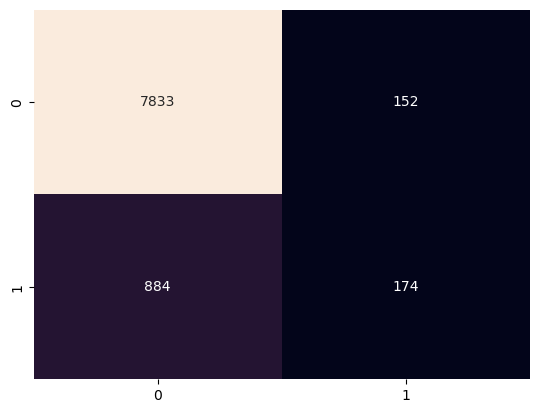

In [31]:
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False)

In [21]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.53      0.16      0.25      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



In [22]:
y_test

1392     0
7518     0
12007    0
5536     0
29816    0
        ..
12636    0
13364    0
16102    0
42097    0
31033    0
Name: y, Length: 9043, dtype: int32

In [23]:
model.predict_proba(x_test)

array([[0.93912415, 0.06087585],
       [0.97145298, 0.02854702],
       [0.97886064, 0.02113936],
       ...,
       [0.87128042, 0.12871958],
       [0.88319691, 0.11680309],
       [0.87772442, 0.12227558]])

In [24]:
model.predict_proba(x_test)[:,1]

array([0.06087585, 0.02854702, 0.02113936, ..., 0.12871958, 0.11680309,
       0.12227558])

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

In [26]:
fpr

array([0.00000000e+00, 0.00000000e+00, 5.00939261e-04, ...,
       9.62429555e-01, 9.62429555e-01, 1.00000000e+00])

In [27]:
tpr

array([0.00000000e+00, 9.45179584e-04, 9.45179584e-04, ...,
       9.99054820e-01, 1.00000000e+00, 1.00000000e+00])

In [28]:
pd.DataFrame({'False Positive Rate': fpr, 
             'True Positive Rate': tpr,
             'Thresholds': thresholds})

,False Positive Rate,True Positive Rate,Thresholds
0,0.000000,0.000000,1.999855e+00
1,0.000000,0.000945,9.998547e-01
2,0.000501,0.000945,9.926733e-01
3,0.000501,0.003781,9.903410e-01
4,0.000751,0.003781,9.877261e-01
...,...,...,...
1552,0.957295,0.998110,5.007339e-03
1553,0.957295,0.999055,4.991060e-03
1554,0.962430,0.999055,3.995017e-03
1555,0.962430,1.000000,3.993911e-03


In [29]:
auc = roc_auc_score(y_test, prediction)
auc

0.5727127778573483

Text(0.5, 1.0, 'logit model (area = 0.57)')

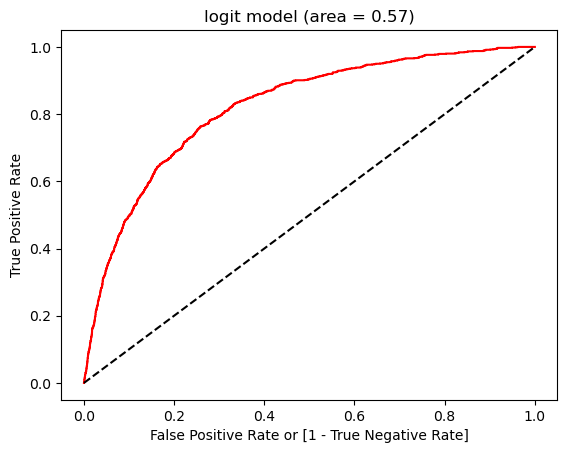

In [30]:
plt.plot(fpr, tpr, color='red') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)